## Instance Segmentation : Update 2

### Importing Libraries

In [1]:
import torch
import torch.nn
import torchvision
from torch.utils.data import Dataset
import torch.nn as nn
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from torchvision.transforms import ToPILImage
from pathlib import Path
import re
import matplotlib.pyplot as plt


C:\Users\prava\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prava\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\prava\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Data Pre-processing

In [76]:
# Creating a CustomDataset class which retrives the images and annotations.

class CustomDataset(Dataset):
    def __init__(self,path_of_image,path_of_maskedimage):
        super().__init__()
        images_path = Path(path_of_image)
        maskedimages_path = Path(path_of_maskedimage)
        self.images = [p for p in images_path.glob('*.jpg')]
        self.maskedimages = [p for p in maskedimages_path.glob('*.png')]
        self.transform1 = torchvision.transforms.Compose([torchvision.transforms.Resize((1080,1080)),
                                                         torchvision.transforms.Normalize((0.0,0.0,0.0),(255.,255.,255.))])
        self.transform2 = torchvision.transforms.Compose([torchvision.transforms.Resize((1080,1080)),
                                                         torchvision.transforms.Normalize((0.0),(255.))])
        
    def __len__(self):
        length = len(self.images)
        return length
    
    def __getitem__(self,index):
        
        img = torchvision.io.read_image(str(self.images[index]))
        masked_img = torchvision.io.read_image(str(self.maskedimages[index]))
        img = torch.tensor(img,dtype=torch.float)
        masked_img = torch.tensor(masked_img,dtype=torch.float)
        img = self.transform1(img)
        print("Image type: ",type(img))
        masked_img = self.transform2(masked_img)
        return img,masked_img

In [77]:
def load_dataset():
    # Calling CustomDataset with train, validation and test datasets
    d = (CustomDataset('Dataset/images/train','Dataset/annotations/train'),CustomDataset('Dataset/images/val','Dataset/annotations/val'),CustomDataset('Dataset/images/test','Dataset/annotations/test'))
    return d

In [78]:
def dataset_evaluation():
    d = load_dataset()
    for i in range(0,3):
        dataset = d[i]
        train_dataloader = torch.utils.data.DataLoader(dataset,batch_size=9)
        if i == 0 :
            print("Training Images : Original and Annotated Images samples for each batch")
        elif i == 1 :
            print("Validation Images : Original and Annotated Images samples for each batch")
        else :
            print(" Testing Images : Original and Annotated Images samples for each batch")
        for batch in train_dataloader:
            images,annotated_imgs = batch
            print(images.shape)
            print("Shape of images:",images.shape)
            img_np = images[0].permute([1,2,0]).numpy()
            print("Image np type: ",type(img_np))
            maskedimage_np = annotated_imgs[0].permute([1,2,0]).numpy()
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            ax1.imshow(img_np)
            ax2.imshow(maskedimage_np)
            plt.show()
    

Training Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


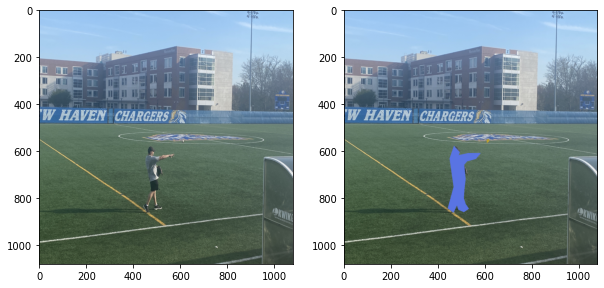

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


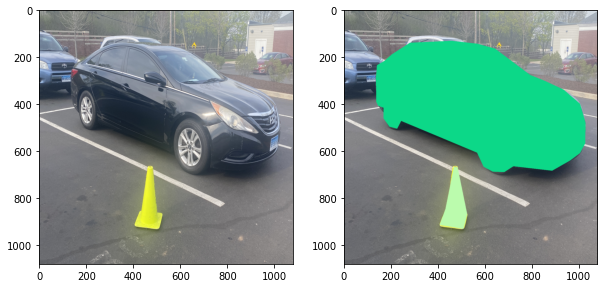

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


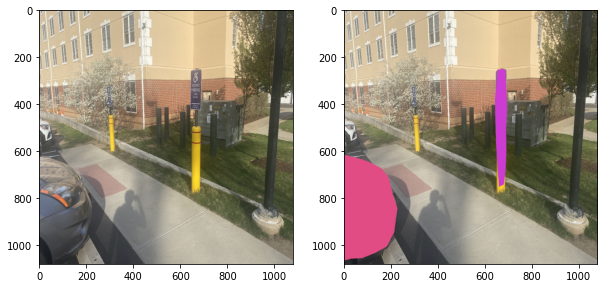

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


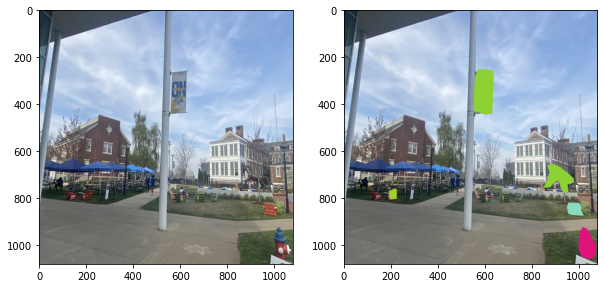

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


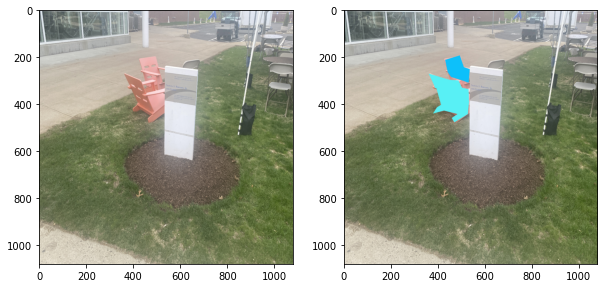

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


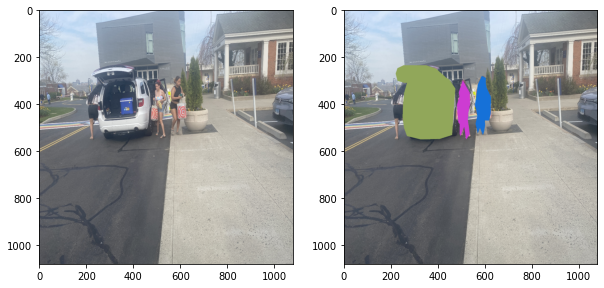

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


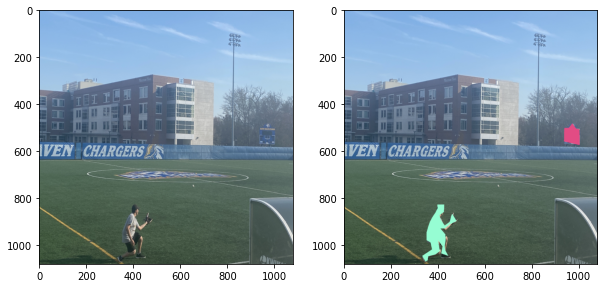

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


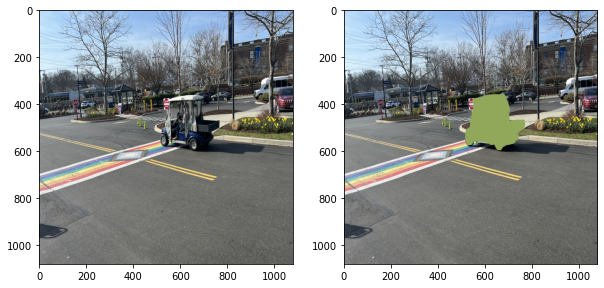

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


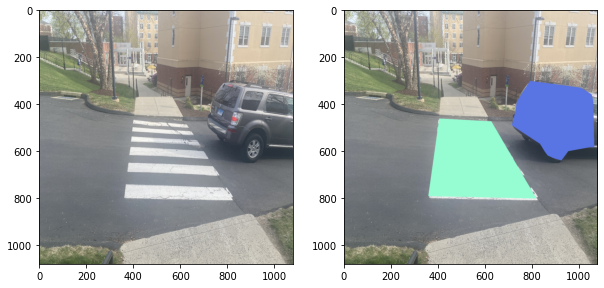

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


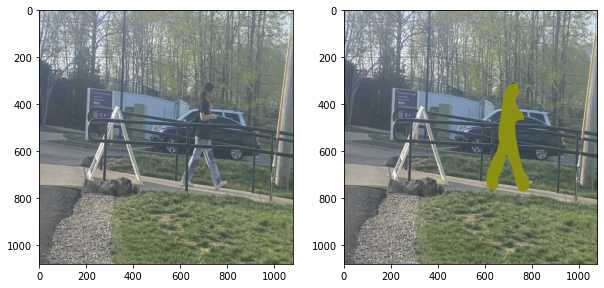

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


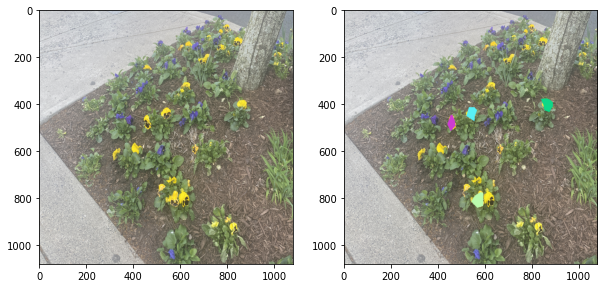

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([3, 3, 1080, 1080])
Shape of images: torch.Size([3, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


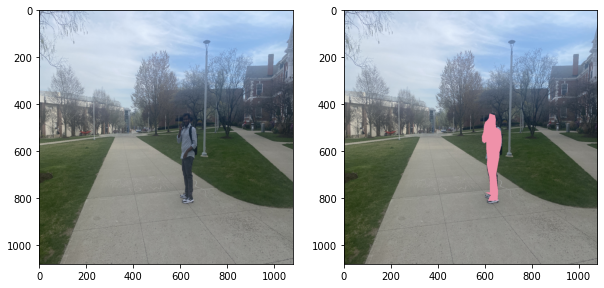

Validation Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


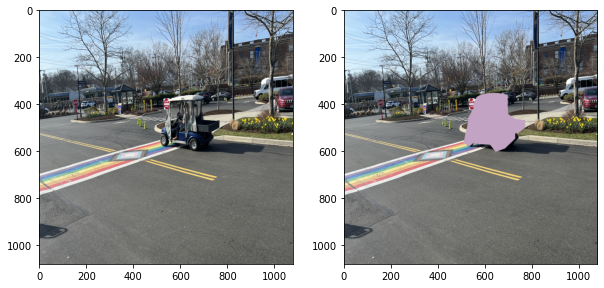

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([4, 3, 1080, 1080])
Shape of images: torch.Size([4, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


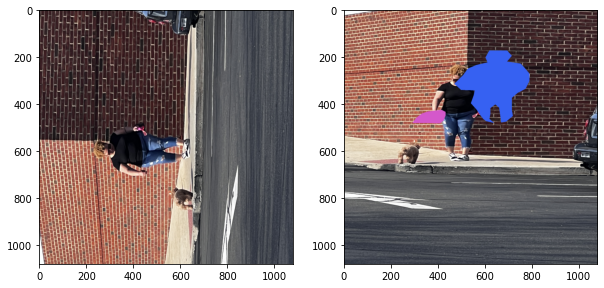

 Testing Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([9, 3, 1080, 1080])
Shape of images: torch.Size([9, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


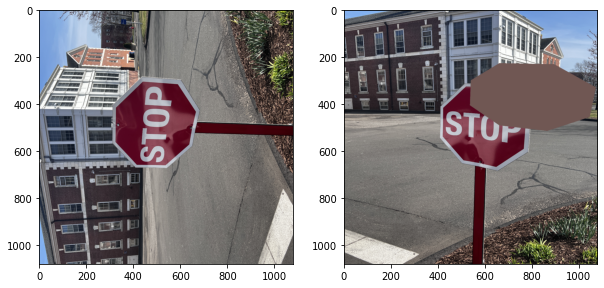

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
torch.Size([4, 3, 1080, 1080])
Shape of images: torch.Size([4, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


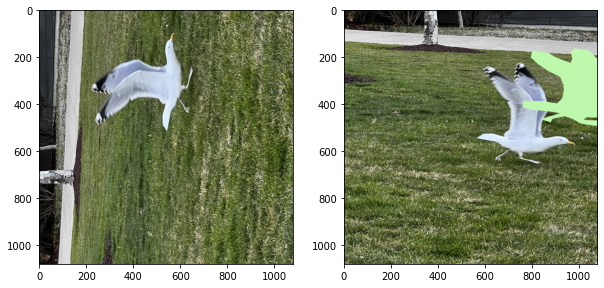

In [79]:
dataset_evaluation()

Training Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


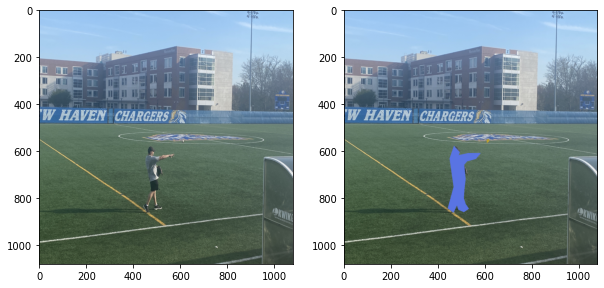

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


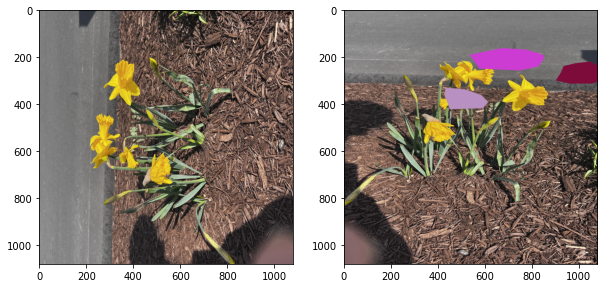

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


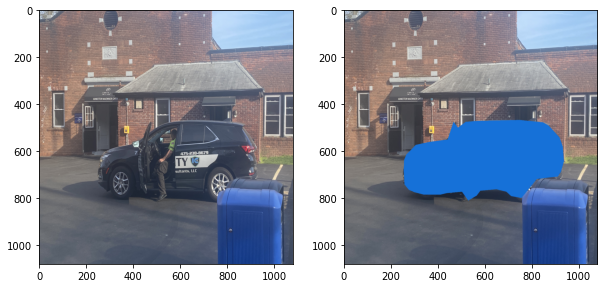

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


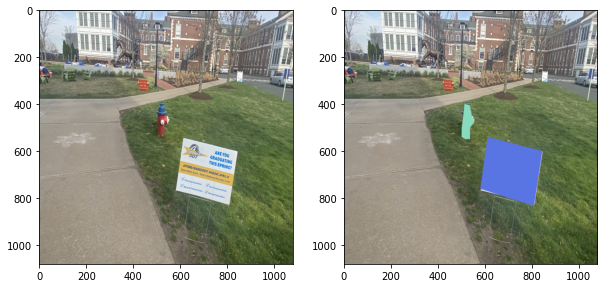

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


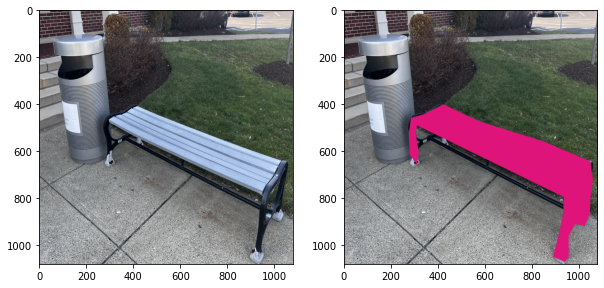

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


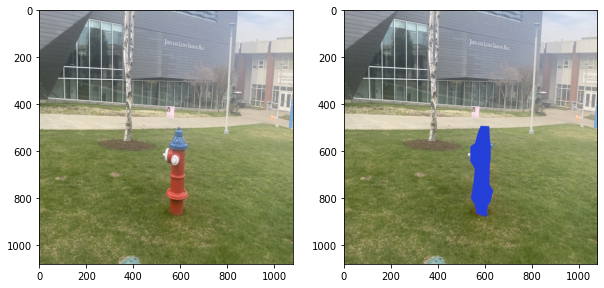

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


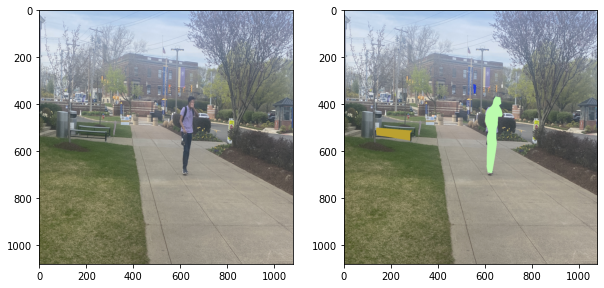

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


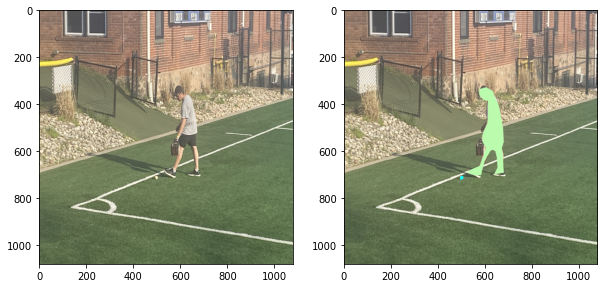

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


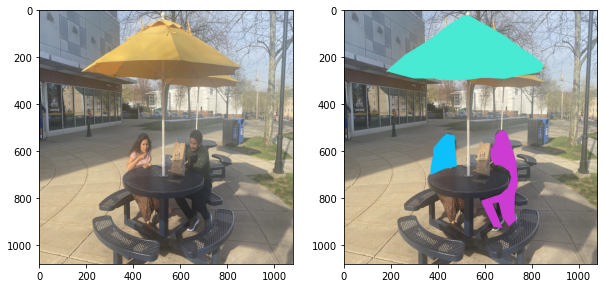

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


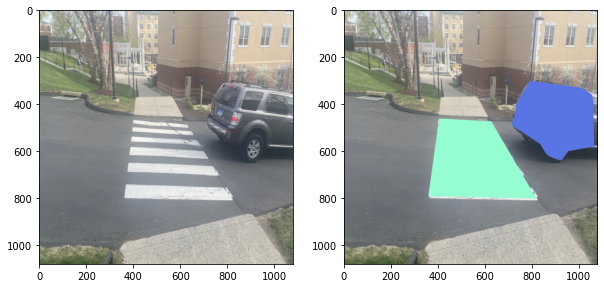

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


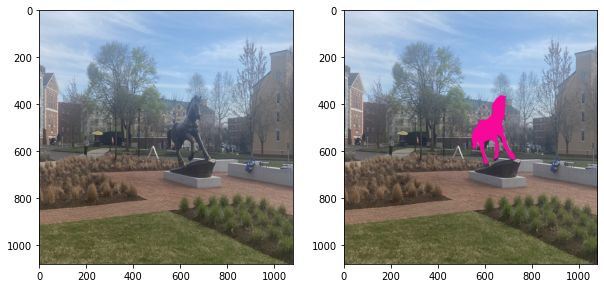

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


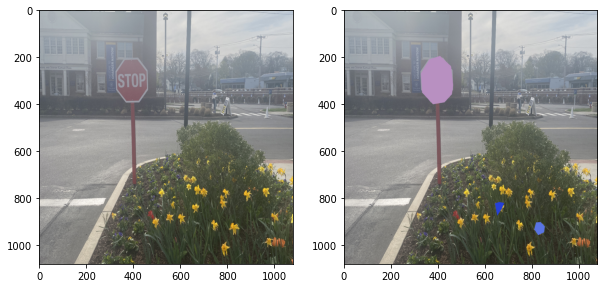

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([6, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


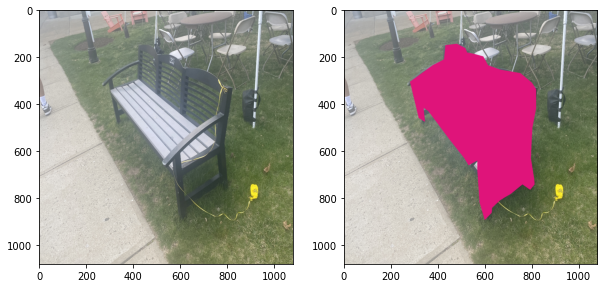

Validation Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


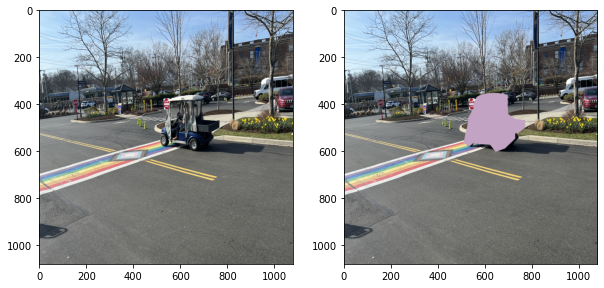

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([5, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


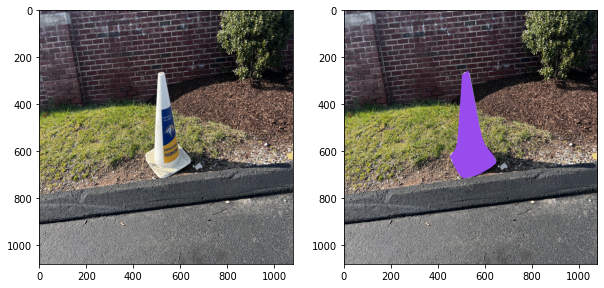

 Testing Images : Original and Annotated Images samples for each batch
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([8, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


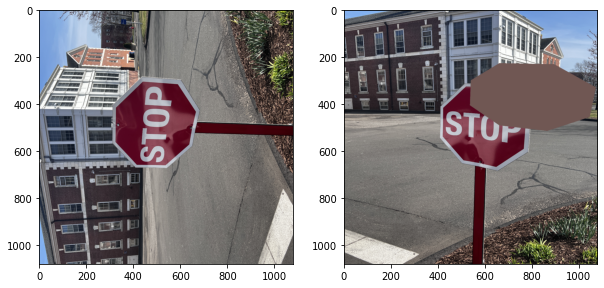

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image type:  <class 'torch.Tensor'>
Shape of images: torch.Size([5, 3, 1080, 1080])
Image np type:  <class 'numpy.ndarray'>


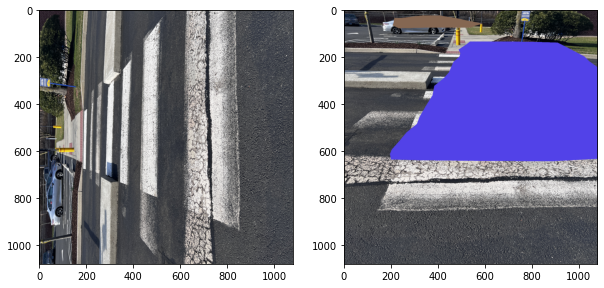

In [10]:
# for i in range(0,3):
#     dataset = d[i]
#     train_dataloader = torch.utils.data.DataLoader(dataset,batch_size=8)
#     if i == 0 :
#         print("Training Images : Original and Annotated Images samples for each batch")
#     elif i == 1 :
#         print("Validation Images : Original and Annotated Images samples for each batch")
#     else :
#         print(" Testing Images : Original and Annotated Images samples for each batch")
#     for batch in train_dataloader:
#         images,annotated_imgs = batch
#         print("Shape of images:",images.shape)
#         img_np = images[0].permute([1,2,0]).numpy()
#         print("Image np type: ",type(img_np))
#         maskedimage_np = annotated_imgs[0].permute([1,2,0]).numpy()
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#         ax1.imshow(img_np)
#         ax2.imshow(maskedimage_np)
#         plt.show()

### Transfer Learning

In [75]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
# from my_dataset import MyDataset  # Custom dataset class
from torch.utils.data import DataLoader
from torch.optim import SGD
import torch.nn.functional as F

# Define your model
model = maskrcnn_resnet50_fpn(num_classes=3)

# Prepare your data loaders
train_dataset = CustomDataset('Dataset/images/train','Dataset/annotations/train')  # Replace 'train' with the name of your training dataset
val_dataset = CustomDataset('Dataset/images/val','Dataset/annotations/val')  # Replace 'val' with the name of your validation dataset
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

# Define your optimizer and loss function
optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
loss_fn = F.cross_entropy

# Train your model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, targets in train_loader:
        optimizer.zero_grad()
#         print(targets)
        loss = 0
        for i in range(len(images)):
            #print(images[i])
            in_img =images[i].unsqueeze(0)
            tr_img =targets[i].unsqueeze(0)
            output = model(in_img,tr_img)
            loss += loss_fn(output['masks'], tr_img[i]['masks'])
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for images, targets in val_loader:
            for i in range(len(images)):
                output = model(images[i].unsqueeze(0))
                val_loss += loss_fn(output['masks'][0], targets[i]['masks'])
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


IndexError: too many indices for tensor of dimension 3

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [25]:
for epoch in range(num_epochs):
    for i, (images, targets) in enumerate(train_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss = 0
        for i in range(len(images)):
            in_img = images[i].unsqueeze(0)
            target = {'boxes': targets[i]['boxes'][0],
                      'labels': targets[i]['labels'][0],
                      'masks': targets[i]['masks'][0]}  # remove extra dimension
            output = model(in_img, [target])
            loss += loss_fn(output['masks'][0], target['masks'])
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


AttributeError: 'Tensor' object has no attribute 'items'

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import Compose, Resize, ToTensor

# Define device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


# Define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Define learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Define loss function
loss_fn = torch.nn.functional.binary_cross_entropy_with_logits

# Train the model
for epoch in range(10):
    model.train()
    for i, (images, targets) in enumerate(train_loader):
        images = list(image.to(device) for image in images)
        targets = [{'boxes': box.to(device), 'labels': label.to(device), 'masks': mask.to(device)} for box, label, mask in zip(targets[0]['boxes'], targets[0]['labels'], targets[0]['masks'])]
        loss = 0
        optimizer.zero_grad()
        for image, target in zip(images, targets):
            output = model(image.unsqueeze(0), [target])
            loss += loss_fn(output['masks'][0], target['masks'])
        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{10}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    lr_scheduler.step()


Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>
Image type:  <class 'torch.Tensor'>


IndexError: too many indices for tensor of dimension 3